In [13]:
# importing necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [14]:
# Let's change the default setting
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] =8
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [15]:
#import data
df = pd.read_csv("Car_sales.csv")
df.head(9)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
6,Audi,A8,1.380,39.000,Passenger,62.00,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,134.656858
7,BMW,323i,19.747,NaN,Passenger,26.99,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,6/28/2011,71.191207
8,BMW,328i,9.231,28.675,Passenger,33.40,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,1/29/2012,81.877069


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [17]:
df.shape

(157, 16)

In [18]:
# Drop duplicate rows
df.drop_duplicates(keep ='last')
df.shape

(157, 16)

No duplicate value in the dataset because the shape did/nt change

In [19]:
# Dropping unnecessary columns
drop_cols = ['Vehicle_type']
df = df.drop(drop_cols, axis = 1)

In [17]:
missing_counts = df.isnull().sum()
print(missing_counts)


Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64


In [20]:
len(df.columns)

15

In [21]:
df.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [22]:
df_sort = df.sort_values("Fuel_efficiency", ascending=False)

In [23]:
df_sort

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
26,Chevrolet,Metro,21.855,5.160,9.235,1.0,55.0,93.1,62.6,149.4,1.895,10.3,45.0,4/13/2012,23.276272
136,Toyota,Corolla,142.535,10.025,13.108,1.8,120.0,97.0,66.7,174.0,2.420,13.2,33.0,4/11/2011,47.968972
130,Saturn,SC,24.546,10.590,12.535,1.9,100.0,102.4,66.4,180.0,2.367,12.1,33.0,3/16/2011,40.700072
129,Saturn,SL,80.620,9.200,10.685,1.9,100.0,102.4,66.4,176.9,2.332,12.1,33.0,8/16/2012,39.986425
25,Chevrolet,Prizm,32.299,9.125,13.960,1.8,120.0,97.1,66.7,174.3,2.398,13.2,33.0,9/11/2011,48.297636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,Lincoln,Navigator,22.925,NaN,42.660,5.4,300.0,119.0,79.9,204.8,5.393,30.0,15.0,12/23/2012,123.972047
41,Dodge,Ram Wagon,16.767,15.510,21.315,3.9,175.0,109.6,78.8,192.6,4.245,32.0,15.0,1/6/2012,71.135292
33,Chrysler,Town & Country,53.480,19.540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7/13/2011,NaN
38,Dodge,Intrepid,88.028,12.275,22.505,2.7,202.0,113.0,74.7,203.7,3.489,17.0,NaN,6/2/2012,80.831470


In [24]:
# Maximum and Minimun sales in thousands
maximum_sales = df['Sales_in_thousands'].max()
minimum_sales = df['Sales_in_thousands'].min()

print(f"Maximum Sales: {maximum_sales}")
print(f"Minimum Sales: {minimum_sales}")


Maximum Sales: 540.561
Minimum Sales: 0.11


In [25]:
# Finding maximum/minimum values through function
def max_min_val(col):
    '''
    This function takes the column name as the argument
    and returns the top and bottom observations in the dataframe
    '''
    first = df[col].idxmax()
    first_obs = pd.DataFrame(df.loc[first])
    
    last = df[col].idxmin()
    last_obs = pd.DataFrame(df.loc[last])
    
    min_max_obs = pd.concat([first_obs, last_obs], axis=1)
    
    return min_max_obs
    

In [29]:
max_min_val('Sales_in_thousands')

,56,83
Manufacturer,Ford,Mitsubishi
Model,F-Series,3000GT
Sales_in_thousands,540.561,0.11
__year_resale_value,15.075,20.94
Price_in_thousands,26.935,25.45
Engine_size,4.6,3.0
Horsepower,220.0,161.0
Wheelbase,138.5,97.2
Width,79.1,72.4
Length,224.5,180.3


(array([ 2., 27., 44., 42., 22., 10.,  7.,  1.,  0.,  1.]),
 array([ 55. ,  94.5, 134. , 173.5, 213. , 252.5, 292. , 331.5, 371. ,
        410.5, 450. ]),
 <BarContainer object of 10 artists>)

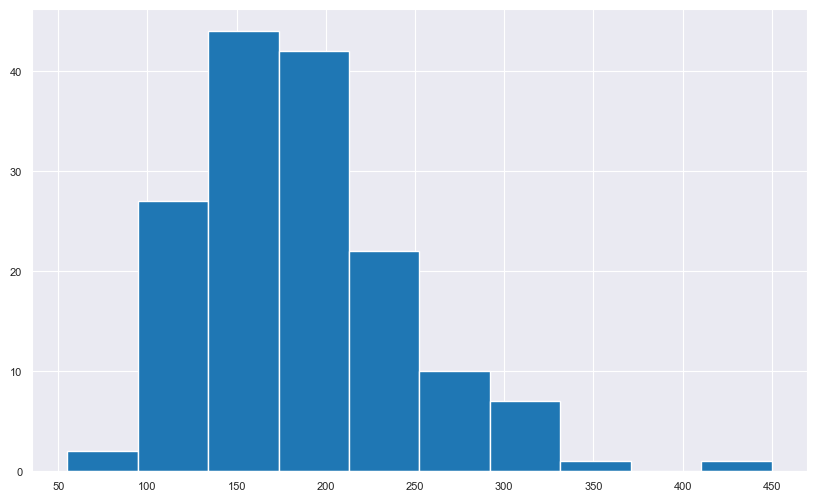

In [26]:
# Creating histogram for continuous numerical variable
plt.hist(df['Horsepower'],10)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


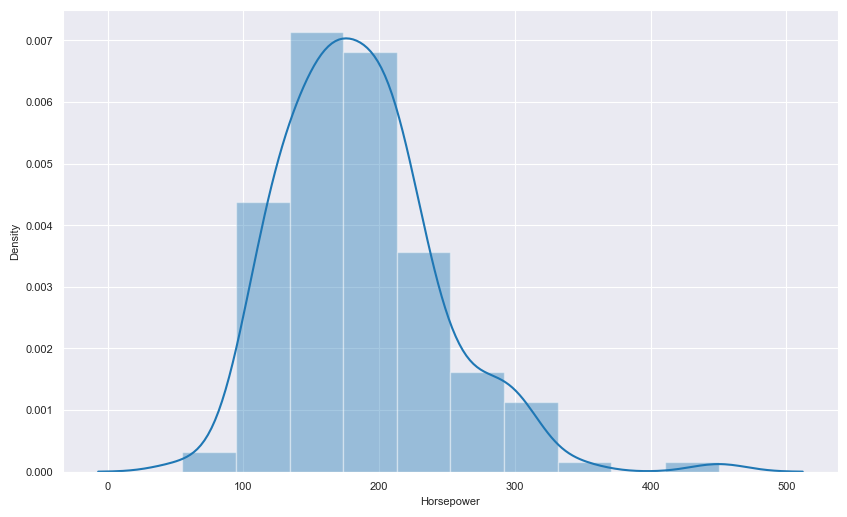

In [34]:
# Probability Distribution Functions
sns.distplot(df['Horsepower'],10);

In [27]:
# Counting it by its category
manf_count = df.groupby('Manufacturer').size();
manf_count

Manufacturer
Acura          4
Audi           3
BMW            3
Buick          4
Cadillac       5
Chevrolet      9
Chrysler       7
Dodge         11
Ford          11
Honda          5
Hyundai        3
Infiniti       1
Jaguar         1
Jeep           3
Lexus          6
Lincoln        3
Mercedes-B     9
Mercury        6
Mitsubishi     7
Nissan         7
Oldsmobile     6
Plymouth       4
Pontiac        6
Porsche        3
Saab           2
Saturn         5
Subaru         2
Toyota         9
Volkswagen     6
Volvo          6
dtype: int64

<AxesSubplot:title={'center':'Manufacturer_distribution'}, xlabel='Manufacturer'>

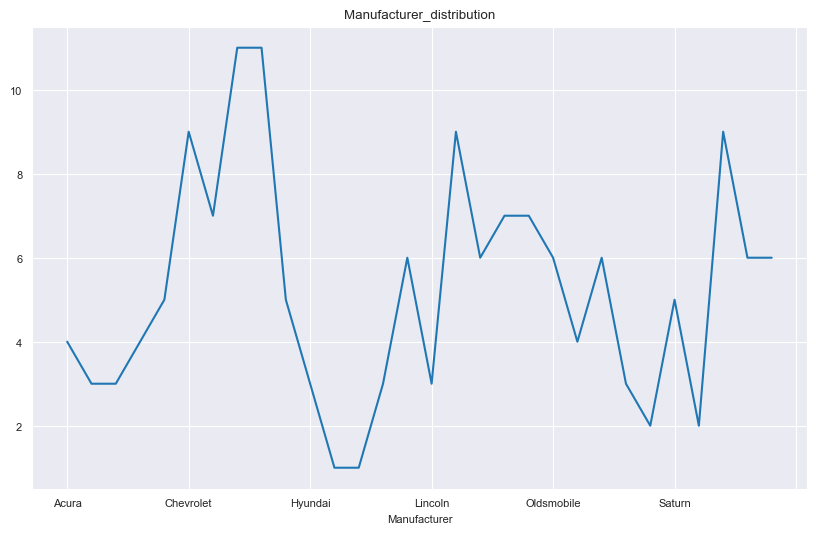

In [43]:
manf_count.plot(title = 'Manufacturer_distribution')

In [28]:
df_num = df.select_dtypes(include = ['float64', 'int64']);
df_num.head(10)

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,14.114,18.225,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
5,18.780,23.555,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105
6,1.380,39.000,62.00,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,134.656858
7,19.747,NaN,26.99,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,71.191207
8,9.231,28.675,33.40,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,81.877069
9,17.527,36.125,38.90,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,83.998724


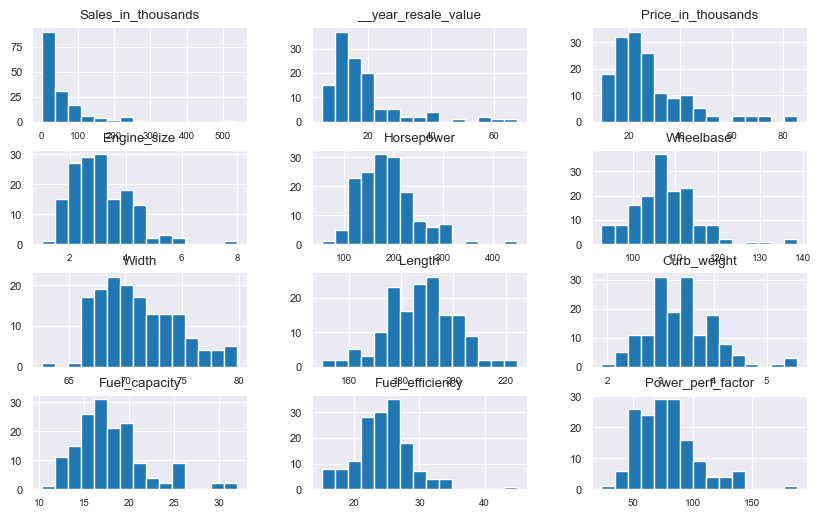

In [56]:
# Customized the appearance of histograms created for the numerical columns named df_num above
matplotlib.rcParams['font.size'] = 8
matplotlib.rcParams['figure.figsize'] = (10,6)
df_num.hist(bins=15,xlabelsize=7);

In [29]:
# calculates the correlation between the 'Price_in_thousands' column and all other numerical columns in the df_num DataFrame
df_corr_price = df_num.corr()['Price_in_thousands'][:-1]
df_corr_price

Sales_in_thousands    -0.304734
__year_resale_value    0.953840
Price_in_thousands     1.000000
Engine_size            0.626875
Horsepower             0.839744
Wheelbase              0.110513
Width                  0.329136
Length                 0.156935
Curb_weight            0.526224
Fuel_capacity          0.423282
Fuel_efficiency       -0.492157
Name: Price_in_thousands, dtype: float64

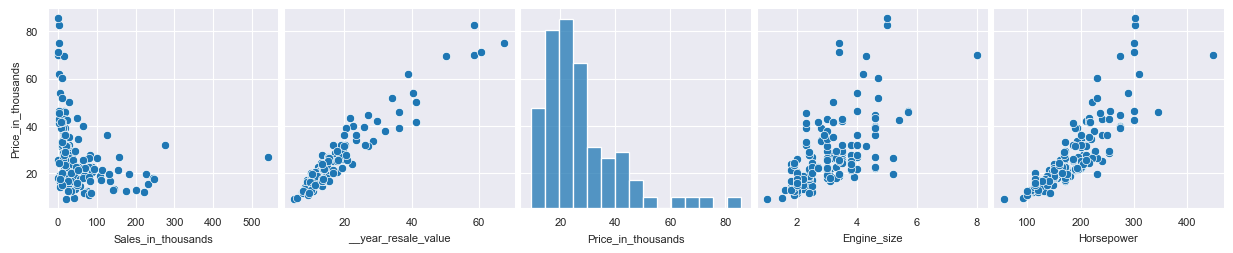

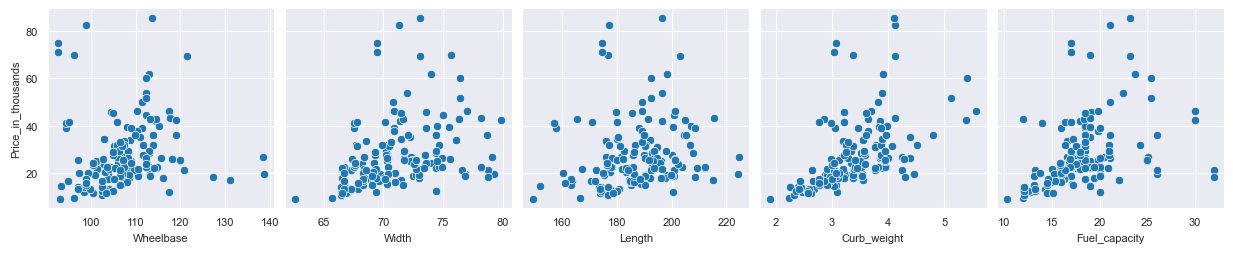

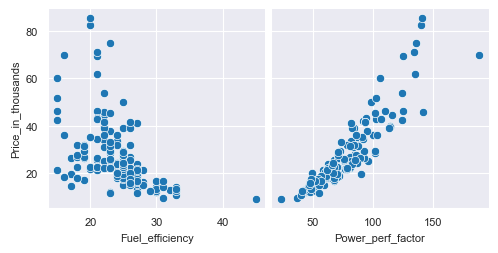

In [72]:
# Correlation using pairplot
for i in range(0, len(df_num.columns),5):
    sns.pairplot(df_num, y_vars ='Price_in_thousands', x_vars = df_num.columns[i:i+5]  )

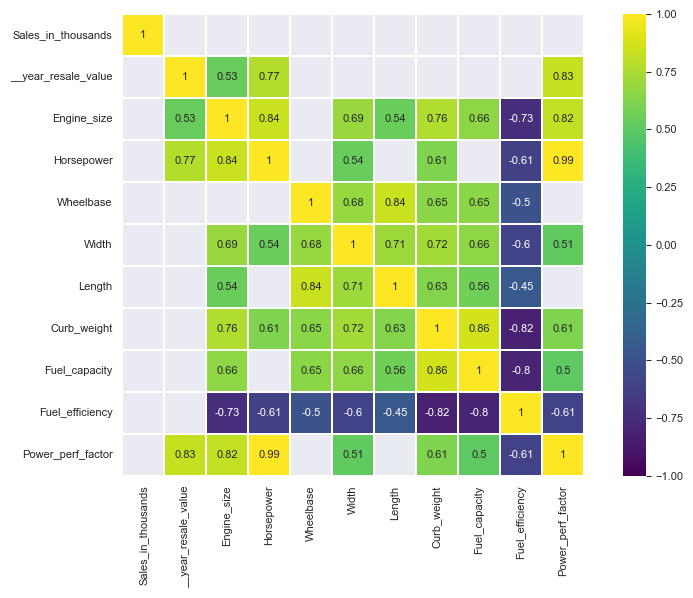

In [31]:
# Significant correlation in one plot( Customized Heatmap)
corr = df_num.drop('Price_in_thousands', axis =1).corr()
sns.heatmap(corr[(corr >= 0.5) |(corr <= -0.4)],
           cmap= 'viridis', vmax = 1.0, vmin = -1.0, linewidths = 0.1,
           annot = True, annot_kws={"size":8}, square =True);


In [32]:
df.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width',
       'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency',
       'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

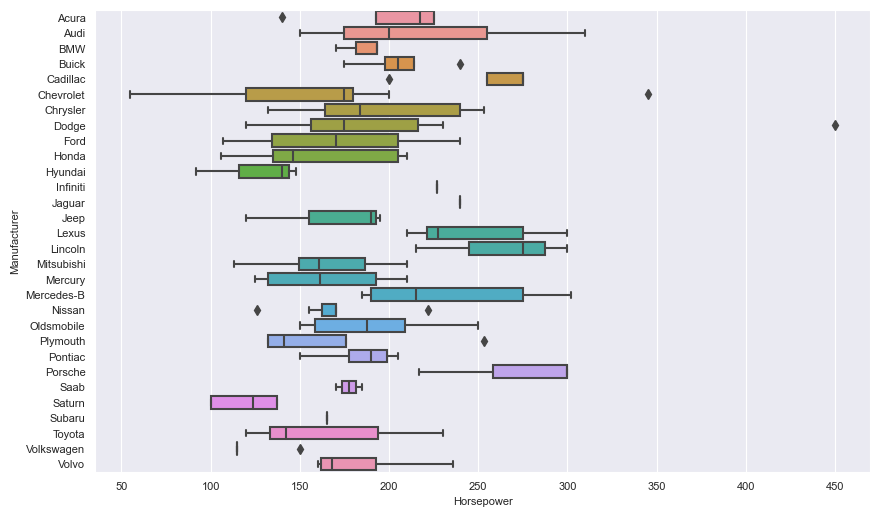

In [75]:
# Boxplot for some categorical variables
bp1 = sns.boxplot(y='Manufacturer', x='Horsepower', data = df )

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


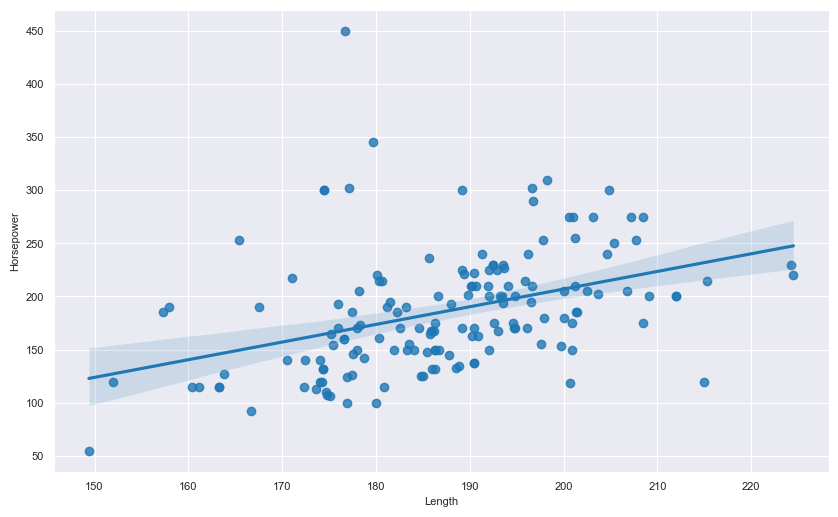

In [33]:
# Scatterplot of 'Length' on the x-axis and 'Horsepower' on the y-axis.
sns.regplot(df['Length'],df['Horsepower']);